In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

df = pd.read_csv (r'footpods_sessions.csv')

In [2]:
df.head()

,Unnamed: 0,t,foot,pronation,braking,impact,contact_time,flight_ratio,strike,power,Date,session_id,user_id,t_start,t_end,duration
0,0,2020-12-13 08:28:51.135499001,right,-7.0,6.1250,6.3125,4365,-115.250,4,745,2020-12-13 00:00:00.000,0580685F-9D2C-4739-9142-B579CC9CBAAD,1865743f-9faa-41e6-8a70-74aa34726884,2020-12-13 08:28:52.859,2020-12-13 12:19:46.392,13853.532979
1,1,2020-12-13 08:28:51.229468822,left,6.1,1.0625,1.1250,773,-23.375,13,37,2020-12-13 00:00:00.000,0580685F-9D2C-4739-9142-B579CC9CBAAD,1865743f-9faa-41e6-8a70-74aa34726884,2020-12-13 08:28:52.859,2020-12-13 12:19:46.392,13853.532979
2,2,2020-12-13 08:28:54.909618855,left,42.4,9.1875,9.1875,6354,-30.375,14,248,2020-12-13 00:00:00.000,0580685F-9D2C-4739-9142-B579CC9CBAAD,1865743f-9faa-41e6-8a70-74aa34726884,2020-12-13 08:28:52.859,2020-12-13 12:19:46.392,13853.532979
3,3,2020-12-13 08:28:56.362651825,right,54.7,13.1875,13.8125,8032,-228.500,10,1490,2020-12-13 00:00:00.000,0580685F-9D2C-4739-9142-B579CC9CBAAD,1865743f-9faa-41e6-8a70-74aa34726884,2020-12-13 08:28:52.859,2020-12-13 12:19:46.392,13853.532979
4,4,2020-12-13 08:28:57.099924088,left,7.5,4.2500,3.8750,3766,-30.500,15,146,2020-12-13 00:00:00.000,0580685F-9D2C-4739-9142-B579CC9CBAAD,1865743f-9faa-41e6-8a70-74aa34726884,2020-12-13 08:28:52.859,2020-12-13 12:19:46.392,13853.532979


In [3]:
df = df.iloc[: , 1:]

In [4]:
df.head()

,t,foot,pronation,braking,impact,contact_time,flight_ratio,strike,power,Date,session_id,user_id,t_start,t_end,duration
0,2020-12-13 08:28:51.135499001,right,-7.0,6.1250,6.3125,4365,-115.250,4,745,2020-12-13 00:00:00.000,0580685F-9D2C-4739-9142-B579CC9CBAAD,1865743f-9faa-41e6-8a70-74aa34726884,2020-12-13 08:28:52.859,2020-12-13 12:19:46.392,13853.532979
1,2020-12-13 08:28:51.229468822,left,6.1,1.0625,1.1250,773,-23.375,13,37,2020-12-13 00:00:00.000,0580685F-9D2C-4739-9142-B579CC9CBAAD,1865743f-9faa-41e6-8a70-74aa34726884,2020-12-13 08:28:52.859,2020-12-13 12:19:46.392,13853.532979
2,2020-12-13 08:28:54.909618855,left,42.4,9.1875,9.1875,6354,-30.375,14,248,2020-12-13 00:00:00.000,0580685F-9D2C-4739-9142-B579CC9CBAAD,1865743f-9faa-41e6-8a70-74aa34726884,2020-12-13 08:28:52.859,2020-12-13 12:19:46.392,13853.532979
3,2020-12-13 08:28:56.362651825,right,54.7,13.1875,13.8125,8032,-228.500,10,1490,2020-12-13 00:00:00.000,0580685F-9D2C-4739-9142-B579CC9CBAAD,1865743f-9faa-41e6-8a70-74aa34726884,2020-12-13 08:28:52.859,2020-12-13 12:19:46.392,13853.532979
4,2020-12-13 08:28:57.099924088,left,7.5,4.2500,3.8750,3766,-30.500,15,146,2020-12-13 00:00:00.000,0580685F-9D2C-4739-9142-B579CC9CBAAD,1865743f-9faa-41e6-8a70-74aa34726884,2020-12-13 08:28:52.859,2020-12-13 12:19:46.392,13853.532979


# Session - 9C6B60A5-192C-44E6-9AE4-5C7DB4253B45 - 1

In [5]:
df_s_1 = df[(df['session_id'] == '9C6B60A5-192C-44E6-9AE4-5C7DB4253B45')]

In [6]:
df_s_1.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Session - 20DDD5B1-20F1-4278-BDF8-058BE39F053E - 2

In [7]:
df_s_2 = df[(df['session_id'] == '20DDD5B1-20F1-4278-BDF8-058BE39F053E')]
df_s_2.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9.302000e+03
mean,-14.750591,6.388216,14.285275,294.071598,18.850314,6.484949,256.823479,3.416607e+03
std,3.154479,1.523225,2.164412,114.723995,9.054016,1.009757,34.434139,9.095436e-13
min,-25.300000,0.437500,0.687500,221.000000,-37.500000,2.000000,53.000000,3.416607e+03
25%,-17.400000,5.312500,14.125000,270.000000,17.250000,6.000000,244.000000,3.416607e+03
50%,-15.100000,6.250000,14.750000,282.000000,19.500000,6.000000,258.000000,3.416607e+03
75%,-11.800000,7.687500,15.250000,291.000000,22.750000,7.000000,274.000000,3.416607e+03
max,-5.700000,9.812500,15.750000,5587.000000,60.125000,15.000000,532.000000,3.416607e+03


In [8]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_2[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

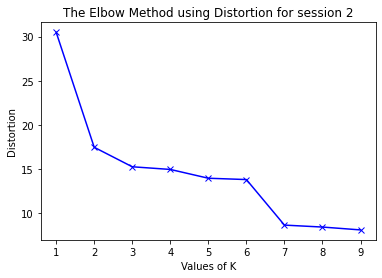

In [9]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 2')
plt.show()

[[ 20.19729632  14.62813399 280.00863405   6.51369825]
 [-26.55503731   2.72784515 768.11940299   2.15834888]]


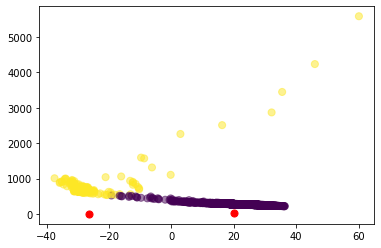

In [10]:
#chose the input parameters
X = df_s_2[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [11]:
df_clu_0 = df_s_2[kmeans.labels_== 0]
df_clu_0.head()

,t,foot,pronation,braking,impact,contact_time,flight_ratio,strike,power,Date,session_id,user_id,t_start,t_end,duration
62816,2020-10-20 17:41:31.043948174,left,-13.4,3.7500,5.6250,496,-6.625,7,184,2020-10-20 00:00:00.000,20DDD5B1-20F1-4278-BDF8-058BE39F053E,1865743f-9faa-41e6-8a70-74aa34726884,2020-10-20 17:40:51.200,2020-10-20 18:37:47.807,3416.607238
62817,2020-10-20 17:41:31.410662174,right,-18.2,4.8750,6.6875,508,-12.750,7,280,2020-10-20 00:00:00.000,20DDD5B1-20F1-4278-BDF8-058BE39F053E,1865743f-9faa-41e6-8a70-74aa34726884,2020-10-20 17:40:51.200,2020-10-20 18:37:47.807,3416.607238
62818,2020-10-20 17:41:31.615272999,left,-13.5,4.5625,7.3125,441,-0.250,7,215,2020-10-20 00:00:00.000,20DDD5B1-20F1-4278-BDF8-058BE39F053E,1865743f-9faa-41e6-8a70-74aa34726884,2020-10-20 17:40:51.200,2020-10-20 18:37:47.807,3416.607238
62819,2020-10-20 17:41:32.011847019,right,-17.2,6.0000,8.1250,452,-6.000,7,360,2020-10-20 00:00:00.000,20DDD5B1-20F1-4278-BDF8-058BE39F053E,1865743f-9faa-41e6-8a70-74aa34726884,2020-10-20 17:40:51.200,2020-10-20 18:37:47.807,3416.607238
62820,2020-10-20 17:41:32.453961849,left,-13.5,5.4375,9.1875,392,5.625,7,230,2020-10-20 00:00:00.000,20DDD5B1-20F1-4278-BDF8-058BE39F053E,1865743f-9faa-41e6-8a70-74aa34726884,2020-10-20 17:40:51.200,2020-10-20 18:37:47.807,3416.607238


In [12]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=True)

# Session - 8188ECCD-8900-4A6E-AC0F-248F99F84466 - 3

In [13]:
df_s_3 = df[(df['session_id'] == '8188ECCD-8900-4A6E-AC0F-248F99F84466')]
df_s_3.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,8572.000000,8572.000000,8572.000000,8572.000000,8572.000000,8572.000000,8572.000000,8572.000000
mean,8.784648,2.509690,1.602055,488.921605,-4.790087,11.717802,112.074545,12733.110181
std,18.617752,0.925098,0.917735,3218.556425,53.920461,3.017747,69.100374,0.000000
min,-47.500000,0.375000,0.000000,0.000000,-2760.000000,1.000000,0.000000,12733.110181
25%,-4.200000,1.812500,0.937500,308.000000,-15.125000,10.000000,62.000000,12733.110181
50%,13.300000,2.437500,1.500000,361.000000,0.000000,12.000000,101.000000,12733.110181
75%,24.725000,3.187500,2.062500,405.000000,1.656250,14.000000,150.000000,12733.110181
max,47.500000,6.437500,6.687500,65535.000000,64.000000,16.000000,561.000000,12733.110181


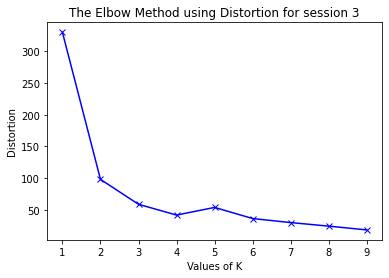

In [14]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_3[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 3')
plt.show()

[[-4.80185066e+00  1.60343089e+00  3.29580049e+02  2.50882938e+00]
 [ 0.00000000e+00  1.04166667e+00  6.53712857e+04  2.86011905e+00]]


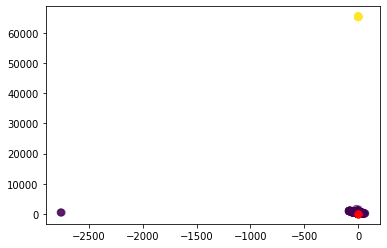

In [15]:
#chose the input parameters
X = df_s_3[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [16]:
df_clu_0 = df_s_3[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,8551.000000,8551.000000,8551.000000,8551.000000,8551.000000,8551.000000,8551.000000,8.551000e+03
mean,8.768273,2.508829,1.603431,329.580049,-4.801851,11.723073,112.193662,1.273311e+04
std,18.627534,0.924451,0.917749,139.536904,53.986115,3.016683,69.081258,1.819096e-12
min,-47.500000,0.375000,0.000000,0.000000,-2760.000000,1.000000,0.000000,1.273311e+04
25%,-4.300000,1.812500,0.937500,307.000000,-15.250000,10.000000,62.000000,1.273311e+04
50%,13.200000,2.437500,1.500000,361.000000,0.000000,12.000000,101.000000,1.273311e+04
75%,24.800000,3.187500,2.062500,405.000000,1.750000,14.000000,150.500000,1.273311e+04
max,47.500000,6.437500,6.687500,1682.000000,64.000000,16.000000,561.000000,1.273311e+04


In [17]:
df_s_3.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - B9495C65-F6D3-45F4-8DA4-8D1D44C6F3E9 - 4

In [18]:
df_s_4 = df[(df['session_id'] == 'B9495C65-F6D3-45F4-8DA4-8D1D44C6F3E9')]
df_s_4.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.00000
mean,-13.528964,5.435261,14.824308,293.900245,18.241753,6.072607,247.366901,4546.86529
std,1.441034,1.015170,1.479972,111.477419,6.853733,1.310006,25.884299,0.00000
min,-31.800000,0.750000,0.812500,250.000000,-233.500000,1.000000,0.000000,4546.86529
25%,-14.300000,4.750000,14.437500,279.000000,16.750000,5.000000,238.000000,4546.86529
50%,-13.500000,5.562500,15.250000,287.000000,18.750000,6.000000,249.000000,4546.86529
75%,-12.700000,6.187500,15.687500,295.000000,20.875000,7.000000,259.000000,4546.86529
max,9.100000,9.187500,15.750000,7985.000000,29.625000,16.000000,1072.000000,4546.86529


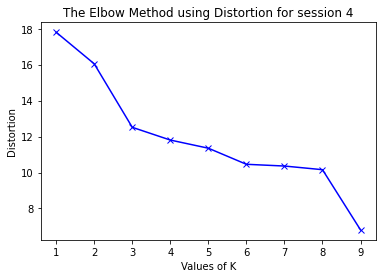

In [19]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_4[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 4')
plt.show()

[[ 1.87059778e+01  1.49303537e+01  2.88258938e+02  5.45918266e+00]
 [-1.66781250e+02  5.98437500e+00  5.48425000e+03  3.85937500e+00]
 [-2.88888889e+01  2.82002315e+00  7.57675926e+02  2.71180556e+00]]


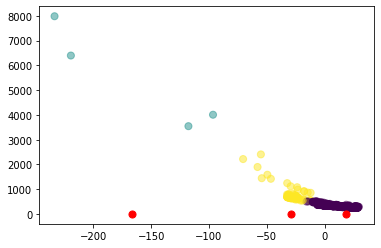

In [20]:
#chose the input parameters
X = df_s_4[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [21]:
df_clu_0 = df_s_4[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,12559.000000,12559.000000,12559.000000,12559.000000,12559.000000,12559.000000,12559.000000,12559.00000
mean,-13.494450,5.459183,14.930354,288.258938,18.705978,6.063779,248.293734,4546.86529
std,1.319071,0.982455,0.953588,17.250125,3.930535,1.295733,20.161447,0.00000
min,-19.400000,2.312500,6.625000,250.000000,-15.625000,4.000000,0.000000,4546.86529
25%,-14.300000,4.750000,14.437500,279.000000,16.875000,5.000000,238.000000,4546.86529
50%,-13.500000,5.625000,15.312500,287.000000,18.750000,6.000000,249.000000,4546.86529
75%,-12.700000,6.187500,15.687500,295.000000,20.875000,7.000000,259.000000,4546.86529
max,-6.000000,9.187500,15.750000,521.000000,29.625000,14.000000,388.000000,4546.86529


In [22]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - F8E0AEA8-E246-43BB-8256-A82F25C6444F - 5

In [23]:
df_s_5 = df[(df['session_id'] == 'F8E0AEA8-E246-43BB-8256-A82F25C6444F')]
df_s_5.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3.670000e+03
mean,-12.187003,5.727282,14.514714,283.034060,22.859673,4.609537,274.492643,1.313823e+03
std,2.558105,2.028941,2.282497,260.842433,11.279752,1.626091,39.676249,2.274047e-13
min,-20.300000,0.500000,1.125000,219.000000,-300.000000,1.000000,0.000000,1.313823e+03
25%,-13.700000,4.000000,14.250000,255.000000,22.250000,3.000000,269.000000,1.313823e+03
50%,-12.000000,6.125000,15.000000,262.000000,24.125000,5.000000,280.000000,1.313823e+03
75%,-10.400000,7.562500,15.625000,268.750000,26.250000,6.000000,290.000000,1.313823e+03
max,20.800000,9.312500,15.750000,11203.000000,39.000000,16.000000,924.000000,1.313823e+03


In [24]:
df_s_5.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 9C6B60A5-192C-44E6-9AE4-5C7DB4253B45 - 6

In [25]:
df_s_6 = df[(df['session_id'] == '9C6B60A5-192C-44E6-9AE4-5C7DB4253B45')]
df_s_6.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Session - FC618C07-06A5-4DFE-8281-FFF442456D2F - 7

In [26]:
df_s_7 = df[(df['session_id'] == 'FC618C07-06A5-4DFE-8281-FFF442456D2F')]
df_s_7.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,1.144200e+04
mean,-13.357053,7.031676,12.436681,290.140972,19.348693,7.219280,241.904300,4.127471e+03
std,3.662166,1.792704,1.847797,119.237557,7.950901,1.696406,27.130151,1.819069e-12
min,-28.800000,1.500000,0.625000,239.000000,-404.250000,2.000000,53.000000,4.127471e+03
25%,-16.600000,5.375000,11.125000,276.000000,17.750000,6.000000,231.000000,4.127471e+03
50%,-13.300000,6.750000,12.312500,284.000000,19.500000,7.000000,242.000000,4.127471e+03
75%,-9.900000,8.687500,13.875000,291.000000,21.625000,8.000000,254.000000,4.127471e+03
max,-2.500000,10.875000,15.750000,6537.000000,65.125000,16.000000,1064.000000,4.127471e+03


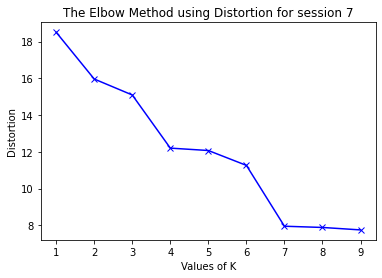

In [27]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_7[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 7')
plt.show()

[[ 1.98805568e+01  1.25276790e+01  2.83865842e+02  7.06839925e+00]
 [-1.39875000e+02  1.59375000e+00  5.75475000e+03  4.87500000e+00]
 [-7.75000000e+01  1.22916667e+00  2.25650000e+03  2.66666667e+00]
 [-2.16773504e+01  4.58173077e+00  6.09341880e+02  3.77777778e+00]]


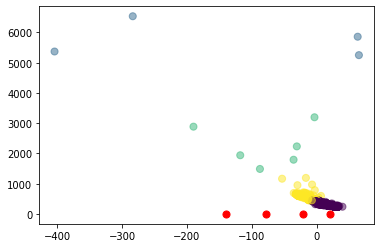

In [28]:
#chose the input parameters
X = df_s_7[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [29]:
df_clu_0 = df_s_7[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,1.131500e+04
mean,-13.329289,7.068399,12.527679,283.865842,19.880557,7.212992,242.769863,4.127471e+03
std,3.629241,1.762284,1.621193,15.857858,3.694368,1.666160,21.497521,1.819070e-12
min,-22.600000,3.562500,6.000000,239.000000,-7.375000,4.000000,53.000000,4.127471e+03
25%,-16.600000,5.437500,11.125000,276.000000,17.875000,6.000000,231.000000,4.127471e+03
50%,-13.200000,6.812500,12.312500,284.000000,19.500000,7.000000,242.000000,4.127471e+03
75%,-9.900000,8.687500,13.937500,291.000000,21.750000,8.000000,254.000000,4.127471e+03
max,-4.900000,10.875000,15.750000,444.000000,39.750000,15.000000,409.000000,4.127471e+03


In [30]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 0580685F-9D2C-4739-9142-B579CC9CBAAD - 8

In [31]:
df_s_8 = df[(df['session_id'] == '0580685F-9D2C-4739-9142-B579CC9CBAAD')]
df_s_8.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,1.894500e+04
mean,10.186081,8.970596,11.686923,294.154236,18.422565,6.417947,232.430351,1.385353e+04
std,6.217302,1.390638,1.843314,121.687869,9.817662,2.632156,67.099996,5.457112e-12
min,-9.100000,0.125000,0.062500,91.000000,-228.500000,1.000000,0.000000,1.385353e+04
25%,4.900000,8.312500,11.250000,272.000000,15.875000,5.000000,199.000000,1.385353e+04
50%,10.700000,9.000000,12.062500,282.000000,18.250000,6.000000,246.000000,1.385353e+04
75%,15.600000,9.687500,12.687500,292.000000,21.125000,8.000000,269.000000,1.385353e+04
max,66.700000,15.312500,15.312500,8032.000000,72.625000,16.000000,1490.000000,1.385353e+04


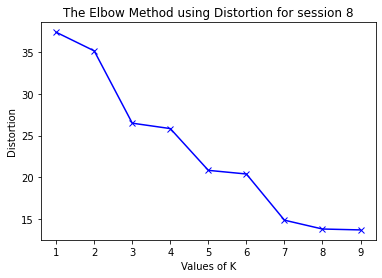

In [32]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_8[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 8')
plt.show()

[[  19.30779272   11.8314272   283.80505357    9.06593239]
 [ -89.703125      8.1640625  4777.375         8.1640625 ]
 [ -15.63406593    5.87912088  635.70989011    5.11222527]]


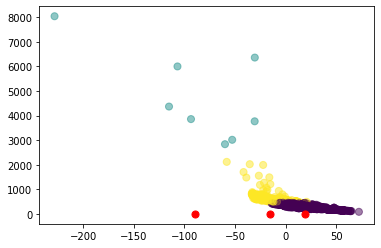

In [33]:
#chose the input parameters
X = df_s_8[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [34]:
df_clu_0 = df_s_8[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,18482.000000,18482.000000,18482.000000,18482.000000,18482.000000,18482.000000,18482.000000,1.848200e+04
mean,10.250130,9.065932,11.831427,283.805054,19.307793,6.394708,234.223948,1.385353e+04
std,6.167332,1.163352,1.476864,37.042494,7.671116,2.637892,63.829854,5.457116e-12
min,-9.100000,0.125000,0.062500,91.000000,-13.625000,1.000000,0.000000,1.385353e+04
25%,5.000000,8.375000,11.312500,272.000000,16.250000,5.000000,203.000000,1.385353e+04
50%,10.900000,9.000000,12.062500,281.000000,18.375000,6.000000,247.000000,1.385353e+04
75%,15.600000,9.687500,12.750000,291.000000,21.375000,8.000000,269.000000,1.385353e+04
max,29.600000,13.187500,15.000000,460.000000,72.625000,16.000000,590.000000,1.385353e+04


In [35]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 38434150-0363-497F-B990-6580C8BB0DE9 - 9

In [36]:
df_s_9 = df[(df['session_id'] == '38434150-0363-497F-B990-6580C8BB0DE9')]
df_s_9.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9157.000000,9157.000000,9157.000000,9157.000000,9157.000000,9157.000000,9157.000000,9.157000e+03
mean,16.376488,5.703874,14.151080,275.048160,24.306596,2.516545,184.859452,5.516058e+03
std,4.369239,0.982965,2.051902,143.821178,13.837700,1.968204,86.373967,9.095444e-13
min,0.400000,0.187500,0.312500,94.000000,-102.500000,1.000000,0.000000,5.516058e+03
25%,12.700000,5.250000,14.000000,237.000000,17.875000,1.000000,116.000000,5.516058e+03
50%,15.300000,5.812500,14.500000,265.000000,23.125000,2.000000,192.000000,5.516058e+03
75%,20.100000,6.312500,15.062500,284.000000,31.375000,3.000000,254.000000,5.516058e+03
max,97.800000,9.125000,15.750000,6896.000000,72.750000,16.000000,1040.000000,5.516058e+03


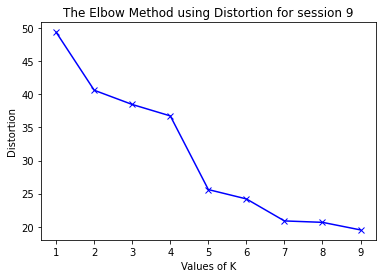

In [37]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_9[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 9')
plt.show()

[[ 2.51255261e+01  1.43323549e+01  2.63008529e+02  5.77083103e+00]
 [-3.30058140e+01  1.46463178e+00  1.11763566e+03  1.01792636e+00]]


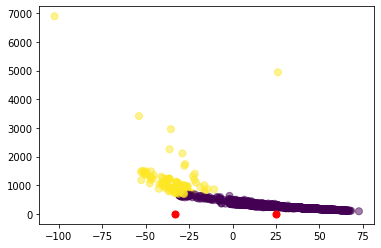

In [38]:
#chose the input parameters
X = df_s_9[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [39]:
df_clu_0 = df_s_9[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9028.000000,9028.000000,9028.000000,9028.000000,9028.000000,9028.000000,9028.000000,9.028000e+03
mean,16.446345,5.770831,14.332355,263.008529,25.125526,2.436642,185.995902,5.516058e+03
std,4.197734,0.804172,1.381405,56.101710,12.022704,1.831036,85.505788,9.095451e-13
min,4.200000,1.187500,1.562500,94.000000,-30.750000,1.000000,0.000000,5.516058e+03
25%,12.700000,5.250000,14.000000,236.000000,18.125000,1.000000,119.000000,5.516058e+03
50%,15.400000,5.812500,14.562500,264.000000,23.250000,2.000000,194.000000,5.516058e+03
75%,20.100000,6.312500,15.062500,283.000000,31.500000,3.000000,255.000000,5.516058e+03
max,31.300000,9.125000,15.750000,682.000000,72.750000,13.000000,515.000000,5.516058e+03


In [40]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - FA68044A-40CC-4466-A43E-B8EEE222DE52 - 10

In [41]:
df_s_10 = df[(df['session_id'] == 'FA68044A-40CC-4466-A43E-B8EEE222DE52')]
df_s_10.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000,1.282200e+04
mean,-9.679114,5.263683,13.350462,310.168928,15.986605,5.441195,235.998674,4.733409e+03
std,2.597226,0.948167,2.755315,141.672616,9.636255,1.632750,31.605816,9.095302e-13
min,-70.600000,0.812500,0.812500,234.000000,-358.125000,1.000000,0.000000,4.733409e+03
25%,-11.600000,4.687500,11.562500,287.000000,15.500000,4.000000,228.000000,4.733409e+03
50%,-9.700000,5.312500,14.500000,295.000000,17.250000,5.000000,239.000000,4.733409e+03
75%,-7.600000,5.937500,15.562500,302.000000,19.125000,6.000000,250.000000,4.733409e+03
max,0.400000,9.812500,15.750000,9558.000000,38.375000,16.000000,594.000000,4.733409e+03


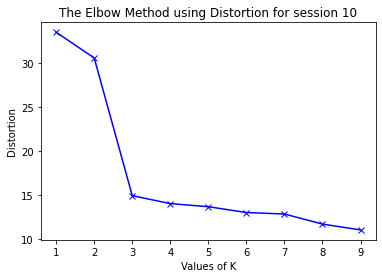

In [42]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_10[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 10')
plt.show()

[[ 1.75215761e+01  1.36726089e+01  2.94827229e+02  5.35386349e+00]
 [-2.52458333e+02  6.37500000e+00  7.27133333e+03  5.12500000e+00]
 [-2.44150000e+01  4.54222222e+00  6.85453333e+02  2.78583333e+00]]


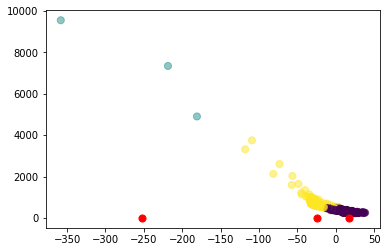

In [43]:
#chose the input parameters
X = df_s_10[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [44]:
df_clu_0 = df_s_10[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,1.236900e+04
mean,-9.728232,5.353863,13.672609,294.827229,17.521576,5.366319,240.094591,4.733409e+03
std,2.368673,0.814118,2.186143,17.955047,3.488873,1.555860,22.581295,1.819063e-12
min,-18.200000,2.625000,4.625000,234.000000,-11.875000,3.000000,0.000000,4.733409e+03
25%,-11.600000,4.750000,11.937500,286.000000,15.750000,4.000000,229.000000,4.733409e+03
50%,-9.800000,5.375000,14.625000,295.000000,17.375000,5.000000,239.000000,4.733409e+03
75%,-7.700000,5.937500,15.562500,301.000000,19.250000,6.000000,251.000000,4.733409e+03
max,-2.200000,7.750000,15.750000,486.000000,38.375000,15.000000,451.000000,4.733409e+03


In [45]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - F2D50DA0-6C70-43DD-8BE1-3C95684AD07C - 11

In [46]:
df_s_11 = df[(df['session_id'] == 'F2D50DA0-6C70-43DD-8BE1-3C95684AD07C')]
df_s_11.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9.312000e+03
mean,10.998958,5.934762,14.464515,237.342032,35.752738,5.734107,114.810137,4.069734e+03
std,5.915528,0.993612,1.822129,210.779310,16.117896,2.611073,59.319622,4.547718e-13
min,-48.500000,0.562500,0.437500,54.000000,-135.500000,1.000000,0.000000,4.069734e+03
25%,6.700000,5.500000,14.250000,186.000000,25.875000,4.000000,73.000000,4.069734e+03
50%,12.300000,5.937500,14.812500,226.000000,36.125000,5.000000,113.000000,4.069734e+03
75%,15.800000,6.375000,15.312500,262.000000,46.875000,7.000000,152.000000,4.069734e+03
max,102.000000,12.562500,15.750000,9045.000000,84.625000,16.000000,671.000000,4.069734e+03


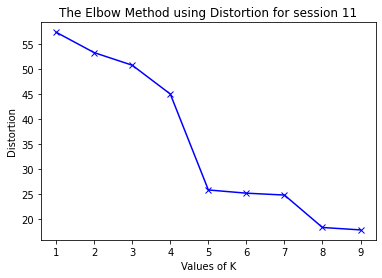

In [47]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_11[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 11')
plt.show()

[[ 3.68242030e+01  1.46664824e+01  2.22657714e+02  5.99927667e+00]
 [-1.04850000e+02  5.91250000e+00  7.52640000e+03  6.03750000e+00]
 [-4.17395833e+01  1.94791667e+00  2.69283333e+03  2.12500000e+00]
 [-2.43988971e+01  2.28170956e+00  7.41625000e+02  1.92233456e+00]]


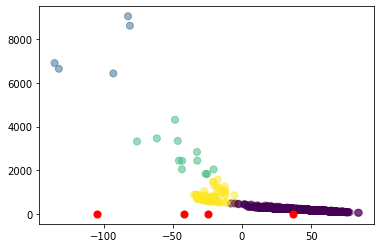

In [48]:
#chose the input parameters
X = df_s_11[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [49]:
df_clu_0 = df_s_11[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9.159000e+03
mean,10.966339,5.999277,14.666482,222.657714,36.824203,5.714052,114.568730,4.069734e+03
std,5.694123,0.848850,0.923732,49.063378,13.761326,2.601512,58.919001,4.547722e-13
min,-6.700000,3.187500,5.000000,54.000000,-7.875000,1.000000,0.000000,4.069734e+03
25%,6.700000,5.500000,14.250000,186.000000,26.375000,4.000000,73.000000,4.069734e+03
50%,12.400000,5.937500,14.875000,225.000000,36.500000,5.000000,113.000000,4.069734e+03
75%,15.800000,6.375000,15.312500,260.000000,47.125000,7.000000,153.000000,4.069734e+03
max,28.600000,11.125000,15.750000,478.000000,84.625000,16.000000,326.000000,4.069734e+03


In [50]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 67C64B4E-1CDB-45DC-9DD9-E5DAF03A1048 - 12

In [51]:
df_s_12 = df[(df['session_id'] == '67C64B4E-1CDB-45DC-9DD9-E5DAF03A1048')]
df_s_12.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9633.000000,9633.000000,9633.000000,9633.000000,9633.000000,9633.000000,9633.000000,9.633000e+03
mean,-11.236178,5.640247,14.045871,303.348178,17.751479,5.016610,250.217897,3.990543e+03
std,1.771733,0.892325,2.026945,673.505473,7.181970,1.407493,33.433460,1.364313e-12
min,-71.000000,0.375000,0.937500,226.000000,-176.250000,2.000000,0.000000,3.990543e+03
25%,-12.200000,5.125000,12.875000,279.000000,15.750000,4.000000,236.000000,3.990543e+03
50%,-11.000000,5.687500,14.625000,288.000000,18.000000,5.000000,249.000000,3.990543e+03
75%,-10.200000,6.250000,15.625000,297.000000,20.375000,6.000000,263.000000,3.990543e+03
max,-2.700000,8.562500,15.750000,65535.000000,36.000000,15.000000,714.000000,3.990543e+03


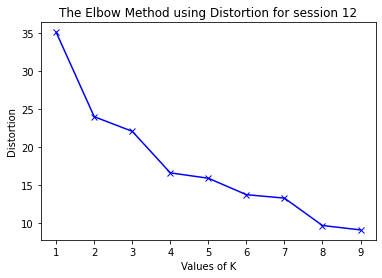

In [52]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_12[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 12')
plt.show()

[[ 1.78073387e+01  1.40505414e+01  2.94745507e+02  5.64191856e+00]
 [ 0.00000000e+00  1.04375000e+01  6.55350000e+04  5.56250000e+00]
 [-8.62500000e+01  5.77500000e+00  3.82060000e+03  2.43750000e+00]]


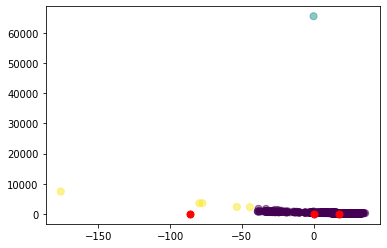

In [53]:
#chose the input parameters
X = df_s_12[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [54]:
df_clu_0 = df_s_12[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9.627000e+03
mean,-11.218303,5.641919,14.050541,294.745507,17.807339,5.014231,250.106679,3.990543e+03
std,1.554975,0.889333,2.017895,59.116369,6.694112,1.402598,32.810972,1.364313e-12
min,-29.700000,0.375000,0.937500,226.000000,-38.875000,2.000000,0.000000,3.990543e+03
25%,-12.200000,5.125000,12.937500,279.000000,15.750000,4.000000,236.000000,3.990543e+03
50%,-11.000000,5.687500,14.625000,288.000000,18.000000,5.000000,249.000000,3.990543e+03
75%,-10.200000,6.250000,15.625000,297.000000,20.375000,6.000000,263.000000,3.990543e+03
max,-2.700000,8.562500,15.750000,1698.000000,36.000000,14.000000,541.000000,3.990543e+03


In [55]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 8188ECCD-8900-4A6E-AC0F-248F99F84466 - 13

In [56]:
df_s_13 = df[(df['session_id'] == '8188ECCD-8900-4A6E-AC0F-248F99F84466')]
df_s_13.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,8572.000000,8572.000000,8572.000000,8572.000000,8572.000000,8572.000000,8572.000000,8572.000000
mean,8.784648,2.509690,1.602055,488.921605,-4.790087,11.717802,112.074545,12733.110181
std,18.617752,0.925098,0.917735,3218.556425,53.920461,3.017747,69.100374,0.000000
min,-47.500000,0.375000,0.000000,0.000000,-2760.000000,1.000000,0.000000,12733.110181
25%,-4.200000,1.812500,0.937500,308.000000,-15.125000,10.000000,62.000000,12733.110181
50%,13.300000,2.437500,1.500000,361.000000,0.000000,12.000000,101.000000,12733.110181
75%,24.725000,3.187500,2.062500,405.000000,1.656250,14.000000,150.000000,12733.110181
max,47.500000,6.437500,6.687500,65535.000000,64.000000,16.000000,561.000000,12733.110181


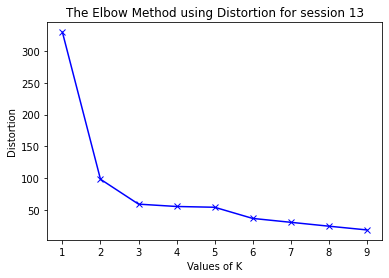

In [57]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_13[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 13')
plt.show()

[[-5.94925776e+00  1.66931511e+00  3.73598650e+02  2.45548246e+00]
 [ 8.88178420e-16  1.04166667e+00  6.53712857e+04  2.86011905e+00]
 [ 2.64975898e+00  1.17555872e+00  4.37099036e+01  2.85528046e+00]]


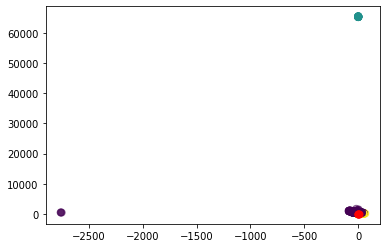

In [58]:
#chose the input parameters
X = df_s_13[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [59]:
df_clu_0 = df_s_13[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,7410.000000,7410.000000,7410.000000,7410.000000,7410.000000,7410.000000,7410.000000,7.410000e+03
mean,7.984157,2.455482,1.669315,373.598650,-5.949258,12.077058,116.964912,1.273311e+04
std,19.143599,0.914641,0.920926,85.374699,57.783422,2.865901,67.000330,1.819112e-12
min,-47.500000,0.375000,0.000000,239.000000,-2760.000000,1.000000,0.000000,1.273311e+04
25%,-6.300000,1.750000,1.000000,321.000000,-16.125000,11.000000,67.000000,1.273311e+04
50%,11.550000,2.375000,1.562500,380.000000,-1.000000,13.000000,105.000000,1.273311e+04
75%,25.100000,3.125000,2.125000,411.000000,3.625000,14.000000,154.000000,1.273311e+04
max,47.100000,6.437500,6.687500,1682.000000,48.000000,16.000000,561.000000,1.273311e+04


In [60]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 20DDD5B1-20F1-4278-BDF8-058BE39F053E - 14

In [61]:
df_s_14 = df[(df['session_id'] == '20DDD5B1-20F1-4278-BDF8-058BE39F053E')]
df_s_14.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9.302000e+03
mean,-14.750591,6.388216,14.285275,294.071598,18.850314,6.484949,256.823479,3.416607e+03
std,3.154479,1.523225,2.164412,114.723995,9.054016,1.009757,34.434139,9.095436e-13
min,-25.300000,0.437500,0.687500,221.000000,-37.500000,2.000000,53.000000,3.416607e+03
25%,-17.400000,5.312500,14.125000,270.000000,17.250000,6.000000,244.000000,3.416607e+03
50%,-15.100000,6.250000,14.750000,282.000000,19.500000,6.000000,258.000000,3.416607e+03
75%,-11.800000,7.687500,15.250000,291.000000,22.750000,7.000000,274.000000,3.416607e+03
max,-5.700000,9.812500,15.750000,5587.000000,60.125000,15.000000,532.000000,3.416607e+03


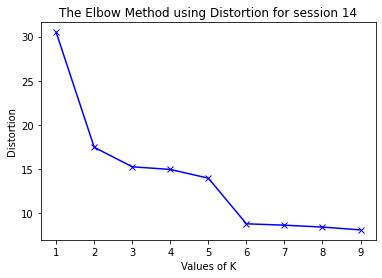

In [62]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_14[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 14')
plt.show()

[[ 20.19729632  14.62813399 280.00863405   6.51369825]
 [-26.55503731   2.72784515 768.11940299   2.15834888]]


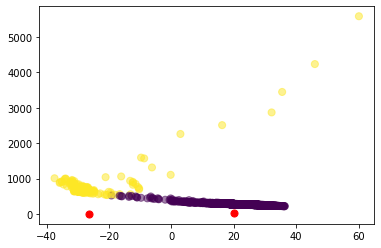

In [63]:
#chose the input parameters
X = df_s_14[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [64]:
df_clu_0 = df_s_14[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9.034000e+03
mean,-14.675515,6.513698,14.628134,280.008634,20.197296,6.448528,260.978415,3.416607e+03
std,3.079299,1.347577,0.843381,17.668646,4.258561,0.947566,24.654811,1.364318e-12
min,-22.300000,3.312500,5.625000,221.000000,-19.250000,3.000000,135.000000,3.416607e+03
25%,-17.400000,5.375000,14.187500,269.000000,17.375000,6.000000,246.000000,3.416607e+03
50%,-14.850000,6.312500,14.750000,282.000000,19.625000,6.000000,259.000000,3.416607e+03
75%,-11.800000,7.687500,15.250000,290.000000,22.750000,7.000000,274.000000,3.416607e+03
max,-8.400000,9.812500,15.750000,522.000000,36.375000,12.000000,532.000000,3.416607e+03


In [65]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - EE4EE92C-E27F-4633-81CA-372D5CA99C3A - 15

In [66]:
df_s_15 = df[(df['session_id'] == 'EE4EE92C-E27F-4633-81CA-372D5CA99C3A')]
df_s_15.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9102.000000,9102.000000,9102.000000,9102.000000,9102.000000,9102.000000,9102.000000,9.102000e+03
mean,9.131059,5.955182,13.911475,231.945836,36.363560,5.818501,85.252033,3.895898e+03
std,4.663545,0.837171,1.873484,173.892298,16.668131,2.963243,75.074663,1.364317e-12
min,-4.200000,0.250000,0.250000,36.000000,-257.375000,1.000000,0.000000,3.895898e+03
25%,6.200000,5.625000,13.250000,186.000000,26.500000,4.000000,10.000000,3.895898e+03
50%,9.400000,6.000000,14.250000,223.000000,36.375000,5.000000,75.000000,3.895898e+03
75%,12.300000,6.437500,15.000000,258.000000,47.000000,7.000000,138.000000,3.895898e+03
max,29.600000,14.250000,15.750000,9394.000000,89.500000,16.000000,784.000000,3.895898e+03


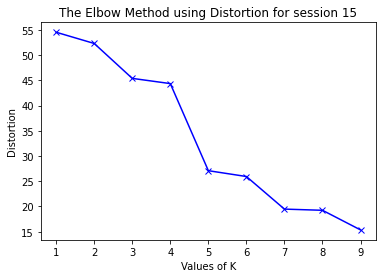

In [67]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_15[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 15')
plt.show()

[[ 3.74707631e+01  1.40995939e+01  2.19235793e+02  6.02141482e+00]
 [-2.40125000e+02  8.71875000e+00  8.78600000e+03  9.06250000e+00]
 [-2.71312950e+01  2.15782374e+00  8.34165468e+02  1.70098921e+00]
 [-9.82500000e+01  3.70312500e+00  3.48875000e+03  3.92187500e+00]]


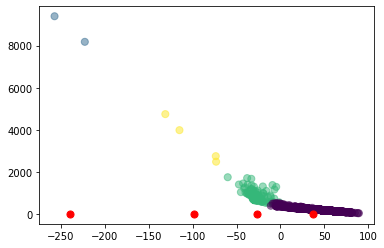

In [68]:
#chose the input parameters
X = df_s_15[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [69]:
df_clu_0 = df_s_15[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,8957.000000,8957.000000,8957.000000,8957.000000,8957.000000,8957.000000,8957.000000,8.957000e+03
mean,9.130445,6.021415,14.099594,219.235793,37.470763,5.803506,84.708273,3.895898e+03
std,4.659940,0.634324,1.145745,49.809790,13.855295,2.963568,74.997834,4.547727e-13
min,-4.200000,2.187500,3.687500,36.000000,-11.000000,1.000000,0.000000,3.895898e+03
25%,6.200000,5.625000,13.312500,185.000000,27.000000,4.000000,0.000000,3.895898e+03
50%,9.400000,6.000000,14.312500,222.000000,36.625000,5.000000,73.000000,3.895898e+03
75%,12.300000,6.437500,15.000000,256.000000,47.125000,7.000000,138.000000,3.895898e+03
max,25.300000,8.937500,15.750000,514.000000,89.500000,16.000000,475.000000,3.895898e+03


In [70]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 6623D25F-CA67-4A39-B792-2618977C5F7D - 16

In [71]:
df_s_16 = df[(df['session_id'] == '6623D25F-CA67-4A39-B792-2618977C5F7D')]
df_s_16.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,11773.000000,11773.000000,11773.000000,11773.000000,11773.000000,11773.000000,11773.000000,1.177300e+04
mean,-11.608248,5.932674,13.244144,298.575639,18.747208,5.652850,254.783063,4.206437e+03
std,2.472448,0.684866,1.968679,623.913405,5.851613,2.146879,32.330159,9.095333e-13
min,-92.500000,0.812500,1.125000,219.000000,-154.500000,1.000000,75.000000,4.206437e+03
25%,-13.000000,5.500000,12.062500,277.000000,16.375000,4.000000,239.000000,4.206437e+03
50%,-11.800000,5.937500,13.937500,288.000000,18.500000,6.000000,254.000000,4.206437e+03
75%,-9.900000,6.375000,14.687500,295.000000,21.375000,7.000000,269.000000,4.206437e+03
max,-4.900000,8.937500,15.750000,65535.000000,35.750000,16.000000,1409.000000,4.206437e+03


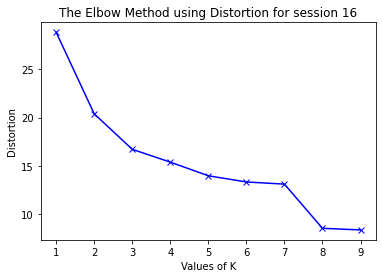

In [72]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_16[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 16')
plt.show()

[[ 1.88089454e+01  1.32519818e+01  2.88870016e+02  5.93467865e+00]
 [ 0.00000000e+00  4.81250000e+00  6.55350000e+04  3.18750000e+00]
 [-5.98611111e+01  3.93750000e+00  5.73533333e+03  3.61805556e+00]]


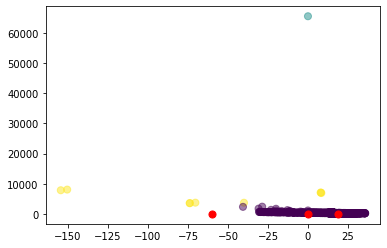

In [73]:
#chose the input parameters
X = df_s_16[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [74]:
df_clu_0 = df_s_16[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,1.176300e+04
mean,-11.571988,5.934679,13.251982,288.870016,18.808945,5.650004,254.380090,4.206437e+03
std,1.972963,0.679725,1.950619,48.033564,5.176231,2.143708,27.984856,9.095334e-13
min,-29.400000,0.812500,1.125000,219.000000,-40.625000,1.000000,75.000000,4.206437e+03
25%,-13.000000,5.500000,12.125000,277.000000,16.375000,4.000000,239.000000,4.206437e+03
50%,-11.800000,5.937500,13.937500,288.000000,18.500000,6.000000,254.000000,4.206437e+03
75%,-9.900000,6.375000,14.687500,295.000000,21.375000,7.000000,269.000000,4.206437e+03
max,-4.900000,8.937500,15.750000,2410.000000,35.750000,15.000000,500.000000,4.206437e+03


In [75]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 19B9ECB2-CFE9-4744-B071-A30E8CC29B40 - 17

In [76]:
df_s_17 = df[(df['session_id'] == '19B9ECB2-CFE9-4744-B071-A30E8CC29B40')]
df_s_17.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,14617.000000,14617.000000,14617.000000,14617.000000,14617.000000,14617.000000,14617.000000,14617.0000
mean,12.297332,7.730156,12.617231,281.850380,20.397645,4.863447,211.171718,5187.7286
std,6.978959,1.160716,1.256966,119.336462,10.226776,2.104863,55.219065,0.0000
min,-5.400000,0.375000,0.500000,87.000000,-276.000000,1.000000,0.000000,5187.7286
25%,5.700000,7.062500,12.187500,265.000000,16.250000,4.000000,177.000000,5187.7286
50%,12.100000,7.812500,12.687500,282.000000,19.000000,4.000000,227.000000,5187.7286
75%,18.800000,8.500000,13.250000,293.000000,23.875000,6.000000,251.000000,5187.7286
max,28.500000,11.250000,15.375000,8734.000000,74.625000,14.000000,1115.000000,5187.7286


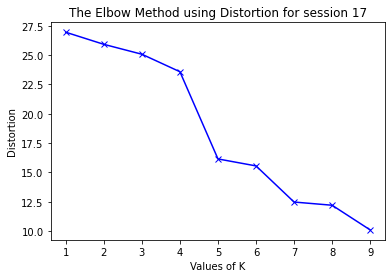

In [77]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_17[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 17')
plt.show()

[[ 2.08371784e+01  1.27002897e+01  2.76420512e+02  7.77519139e+00]
 [-2.65625000e+02  7.09375000e+00  8.05350000e+03  5.59375000e+00]
 [-2.61897727e+01  2.36250000e+00  7.13309091e+02  2.14318182e+00]
 [-9.22916667e+01  1.75000000e+00  2.90250000e+03  2.04166667e+00]]


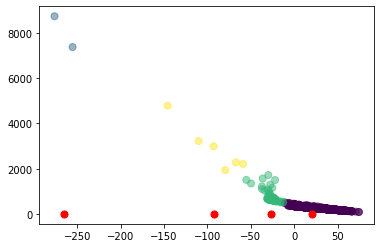

In [78]:
#chose the input parameters
X = df_s_17[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [79]:
df_clu_0 = df_s_17[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,14499.000000,14499.000000,14499.000000,14499.000000,14499.000000,14499.000000,14499.000000,14499.0000
mean,12.263584,7.775191,12.700290,276.420512,20.837178,4.846403,211.595351,5187.7286
std,6.968433,1.047012,0.852954,30.366837,8.463839,2.096067,54.139657,0.0000
min,-2.700000,2.187500,2.937500,87.000000,-10.625000,1.000000,0.000000,5187.7286
25%,5.700000,7.062500,12.187500,265.000000,16.250000,4.000000,178.000000,5187.7286
50%,11.900000,7.875000,12.687500,282.000000,19.000000,4.000000,227.000000,5187.7286
75%,18.800000,8.500000,13.250000,293.000000,23.875000,6.000000,252.000000,5187.7286
max,28.500000,11.250000,15.375000,490.000000,74.625000,14.000000,396.000000,5187.7286


In [80]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 0AD451FE-D853-4084-BE4C-1B0B8B471FDF - 18

In [81]:
df_s_18 = df[(df['session_id'] == '0AD451FE-D853-4084-BE4C-1B0B8B471FDF')]
df_s_18.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000,9393.000000,9.393000e+03
mean,-13.478047,5.809439,14.852663,296.026935,20.394709,6.069094,258.742042,3.460018e+03
std,1.588752,1.010538,2.028675,585.255370,8.342216,1.364639,36.350874,4.547716e-13
min,-23.900000,0.437500,0.375000,219.000000,-186.375000,2.000000,44.000000,3.460018e+03
25%,-14.400000,5.187500,14.687500,267.000000,19.000000,5.000000,249.000000,3.460018e+03
50%,-13.300000,5.937500,15.375000,277.000000,21.000000,6.000000,260.000000,3.460018e+03
75%,-12.400000,6.562500,15.687500,284.000000,23.250000,7.000000,272.000000,3.460018e+03
max,-2.200000,8.875000,15.750000,44992.000000,36.625000,16.000000,2082.000000,3.460018e+03


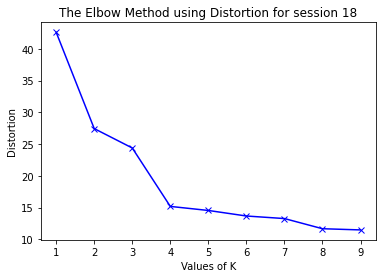

In [82]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_18[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 18')
plt.show()

[[ 2.14618377e+01  1.51314669e+01  2.74965183e+02  5.88473779e+00]
 [-2.37500000e+01  2.25000000e+00  4.49920000e+04  1.62500000e+00]
 [-4.16666667e+01  1.97916667e+00  1.93493333e+04  1.58333333e+00]
 [-2.79772727e+01  2.16950758e+00  7.59272727e+02  2.39930556e+00]]


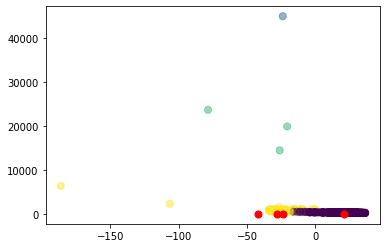

In [83]:
#chose the input parameters
X = df_s_18[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [84]:
df_clu_0 = df_s_18[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9.191000e+03
mean,-13.424230,5.884738,15.131467,274.965183,21.461838,6.058100,261.762267,3.460018e+03
std,1.457944,0.867679,0.739911,14.786419,3.712156,1.333301,19.608923,4.547721e-13
min,-18.900000,3.000000,4.937500,219.000000,-16.000000,3.000000,114.000000,3.460018e+03
25%,-14.300000,5.218750,14.750000,267.000000,19.125000,5.000000,250.000000,3.460018e+03
50%,-13.300000,5.937500,15.375000,276.000000,21.000000,6.000000,261.000000,3.460018e+03
75%,-12.400000,6.562500,15.687500,284.000000,23.375000,7.000000,273.000000,3.460018e+03
max,-6.700000,8.875000,15.750000,507.000000,36.625000,12.000000,375.000000,3.460018e+03


In [85]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - BC4380C1-BF2D-48D6-A460-D12DC9BFEF8F - 19

In [86]:
df_s_19 = df[(df['session_id'] == 'BC4380C1-BF2D-48D6-A460-D12DC9BFEF8F')]
df_s_19.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,-13.424904,5.858163,13.896983,305.921243,17.769455,6.326547,248.305831,3.811849e+03
std,3.640998,0.950663,2.221159,262.839714,10.066443,1.812294,31.662983,4.547677e-13
min,-140.200000,0.250000,0.250000,233.000000,-294.625000,1.000000,0.000000,3.811849e+03
25%,-14.400000,5.312500,12.687500,275.000000,16.500000,5.000000,240.000000,3.811849e+03
50%,-13.200000,6.000000,14.687500,284.000000,18.750000,6.000000,250.000000,3.811849e+03
75%,-12.200000,6.500000,15.375000,292.000000,21.000000,7.000000,261.000000,3.811849e+03
max,30.500000,12.062500,15.750000,8259.000000,116.125000,16.000000,729.000000,3.811849e+03


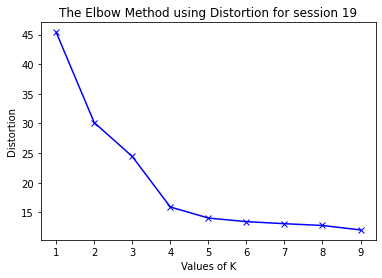

In [87]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_19[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 19')
plt.show()

[[ 1.90262767e+01  1.41627219e+01  2.83817150e+02  5.93338176e+00]
 [-1.46625000e+02  7.95312500e+00  7.03558333e+03  7.07291667e+00]
 [-4.04464286e+01  3.40773810e+00  2.91585714e+03  2.90476190e+00]
 [-2.63226987e+01  2.96757322e+00  7.49297071e+02  2.61767782e+00]]


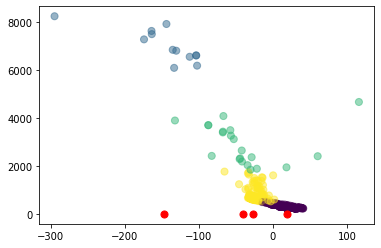

In [88]:
#chose the input parameters
X = df_s_19[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [89]:
df_clu_0 = df_s_19[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,1.092700e+04
mean,-13.240368,5.933382,14.162722,283.817150,19.026277,6.305116,250.632745,3.811849e+03
std,1.560071,0.791664,1.422750,17.058697,3.811820,1.762296,22.021874,4.547682e-13
min,-19.800000,2.750000,5.125000,233.000000,-14.500000,3.000000,0.000000,3.811849e+03
25%,-14.300000,5.375000,12.812500,275.000000,16.750000,5.000000,241.000000,3.811849e+03
50%,-13.100000,6.000000,14.750000,283.000000,18.875000,6.000000,250.000000,3.811849e+03
75%,-12.100000,6.500000,15.375000,292.000000,21.125000,7.000000,261.000000,3.811849e+03
max,-6.300000,8.437500,15.750000,510.000000,41.000000,13.000000,422.000000,3.811849e+03


In [90]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - FF61EDAF-3C20-4121-8F3B-EB2B6944FFBB - 20

In [91]:
df_s_20 = df[(df['session_id'] == 'FF61EDAF-3C20-4121-8F3B-EB2B6944FFBB')]
df_s_20.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000,9.736000e+03
mean,-13.143611,5.703767,14.274092,288.490242,19.433969,6.929848,253.085045,3.475262e+03
std,2.570597,0.817081,1.650517,139.693496,6.841066,1.417808,31.642331,4.547707e-13
min,-155.200000,0.375000,0.812500,230.000000,-182.375000,1.000000,0.000000,3.475262e+03
25%,-14.200000,5.250000,13.875000,272.000000,18.000000,6.000000,243.000000,3.475262e+03
50%,-12.900000,5.750000,14.500000,280.000000,19.750000,7.000000,254.000000,3.475262e+03
75%,-11.800000,6.250000,15.000000,287.000000,21.750000,8.000000,267.000000,3.475262e+03
max,-8.300000,8.125000,15.750000,9494.000000,42.125000,16.000000,1402.000000,3.475262e+03


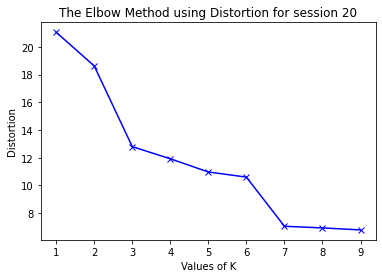

In [92]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_20[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 20')
plt.show()

[[ 2.01340291e+01  1.44489394e+01  2.79462164e+02  5.75977173e+00]
 [-7.13750000e+01  5.39583333e+00  6.70833333e+03  3.87500000e+00]
 [-2.69253597e+01  2.39748201e+00  7.73064748e+02  1.87769784e+00]]


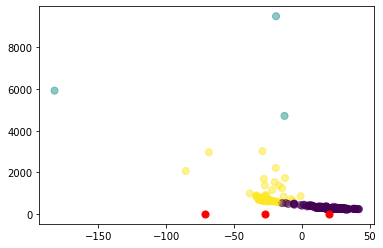

In [93]:
#chose the input parameters
X = df_s_20[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [94]:
df_clu_0 = df_s_20[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9.594000e+03
mean,-13.071982,5.759772,14.448939,279.462164,20.134029,6.931207,254.695226,3.475262e+03
std,1.814125,0.674161,0.807937,14.051686,3.224100,1.406401,22.211203,9.095421e-13
min,-21.300000,3.250000,4.750000,230.000000,-14.500000,3.000000,0.000000,3.475262e+03
25%,-14.200000,5.312500,13.937500,272.000000,18.125000,6.000000,243.000000,3.475262e+03
50%,-12.900000,5.750000,14.562500,280.000000,19.750000,7.000000,254.000000,3.475262e+03
75%,-11.800000,6.250000,15.062500,287.000000,21.875000,8.000000,267.000000,3.475262e+03
max,-8.300000,8.125000,15.750000,522.000000,42.125000,13.000000,422.000000,3.475262e+03


In [95]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 819FF543-6009-4F63-A2DE-EA1F8498D0F8 - 21

In [96]:
df_s_21 = df[(df['session_id'] == '819FF543-6009-4F63-A2DE-EA1F8498D0F8')]
df_s_21.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,15233.000000,15233.000000,15233.000000,15233.000000,15233.000000,15233.000000,15233.000000,15233.000000
mean,-11.549170,5.278327,14.025122,296.608679,17.794230,5.744699,241.543425,5484.143487
std,1.808922,0.854233,1.763086,105.008673,5.168591,1.372375,22.430626,0.000000
min,-127.900000,0.437500,0.437500,225.000000,-179.375000,1.000000,0.000000,5484.143487
25%,-12.400000,4.687500,12.812500,285.000000,15.875000,5.000000,230.000000,5484.143487
50%,-11.400000,5.375000,14.625000,294.000000,17.625000,5.000000,241.000000,5484.143487
75%,-10.600000,5.937500,15.500000,301.000000,19.750000,6.000000,252.000000,5484.143487
max,28.200000,8.562500,15.750000,8087.000000,37.125000,16.000000,940.000000,5484.143487


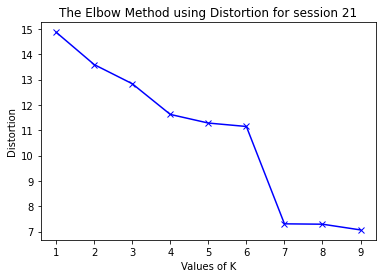

In [97]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_21[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 21')
plt.show()

[[ 1.80254730e+01  1.40755620e+01  2.92714662e+02  5.29270092e+00]
 [-6.15625000e+01  2.05208333e+00  2.88383333e+03  2.00000000e+00]
 [-2.86206140e+01  2.12609649e+00  8.11526316e+02  1.77192982e+00]
 [-1.75062500e+02  6.53125000e+00  7.39200000e+03  6.03125000e+00]]


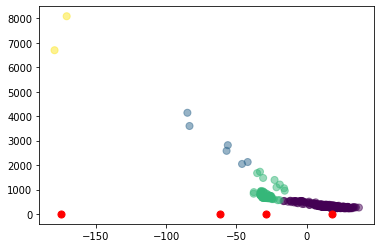

In [98]:
#chose the input parameters
X = df_s_21[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [99]:
df_clu_0 = df_s_21[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,15168.000000,15168.000000,15168.000000,15168.000000,15168.000000,15168.000000,15168.000000,15168.000000
mean,-11.522785,5.292701,14.075562,292.714662,18.025473,5.736617,242.081487,5484.143487
std,1.402812,0.822723,1.586328,15.950398,3.329437,1.354849,18.880338,0.000000
min,-19.600000,2.437500,6.187500,225.000000,-16.500000,2.000000,97.000000,5484.143487
25%,-12.400000,4.687500,12.812500,285.000000,15.875000,5.000000,230.000000,5484.143487
50%,-11.400000,5.375000,14.625000,294.000000,17.625000,5.000000,241.000000,5484.143487
75%,-10.600000,5.937500,15.500000,300.250000,19.750000,6.000000,252.000000,5484.143487
max,-5.800000,8.375000,15.750000,537.000000,37.125000,14.000000,434.000000,5484.143487


In [100]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)

# Session - 16A796BA-4F88-4C13-9245-4360066D7D3E - 22

In [101]:
df_s_22 = df[(df['session_id'] == '16A796BA-4F88-4C13-9245-4360066D7D3E')]
df_s_22.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,1.983600e+04
mean,-8.696960,7.158881,13.656121,292.839433,16.633028,8.281660,260.976407,4.675366e+04
std,3.387386,2.074719,2.219087,75.168827,7.442587,2.464258,39.112619,1.455228e-11
min,-111.800000,0.312500,0.250000,219.000000,-101.750000,2.000000,0.000000,4.675366e+04
25%,-11.000000,5.500000,12.875000,275.000000,15.375000,6.000000,247.000000,4.675366e+04
50%,-8.600000,7.187500,14.125000,283.000000,17.875000,8.000000,263.000000,4.675366e+04
75%,-6.300000,8.937500,15.250000,293.000000,20.125000,10.000000,278.000000,4.675366e+04
max,2.700000,12.750000,15.750000,7006.000000,35.375000,16.000000,630.000000,4.675366e+04


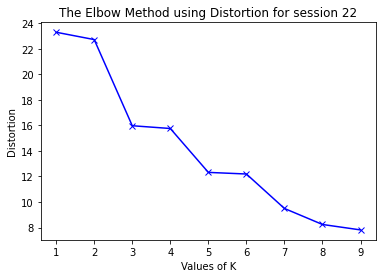

In [102]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = df_s_22[["flight_ratio","impact","contact_time","braking"]]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for session 22')
plt.show()

[[ 1.72792200e+01  1.38133709e+01  2.86601281e+02  7.22909196e+00]
 [-7.70625000e+01  7.53125000e+00  5.30200000e+03  5.62500000e+00]
 [-2.29410828e+01  3.91958599e+00  6.48732484e+02  2.80394108e+00]]


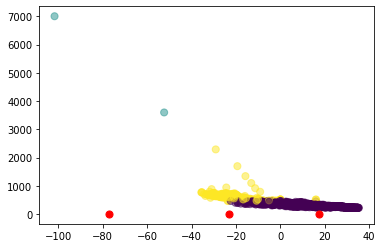

In [103]:
#chose the input parameters
X = df_s_22[["flight_ratio","impact","contact_time","braking"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(X['flight_ratio'], X['contact_time'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [104]:
df_clu_0 = df_s_22[kmeans.labels_== 0]
df_clu_0.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power,duration
count,19520.000000,19520.000000,19520.000000,19520.000000,19520.000000,19520.000000,19520.000000,1.952000e+04
mean,-8.616358,7.229092,13.813371,286.601281,17.279220,8.284170,263.329355,4.675366e+04
std,3.191668,2.008142,1.834702,22.150570,5.376495,2.471423,33.853018,1.455229e-11
min,-25.300000,1.375000,0.812500,219.000000,-22.375000,3.000000,96.000000,4.675366e+04
25%,-10.925000,5.562500,12.937500,275.000000,15.625000,6.000000,248.000000,4.675366e+04
50%,-8.500000,7.250000,14.187500,283.000000,18.000000,8.000000,263.000000,4.675366e+04
75%,-6.300000,9.000000,15.250000,292.000000,20.125000,10.000000,278.000000,4.675366e+04
max,2.700000,12.750000,15.750000,462.000000,35.375000,16.000000,577.000000,4.675366e+04


In [105]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\footpods_updated.csv', mode='a', header=False)